# **🔎📊🧩 Basic Data Exploration**

<img src="../assets/banner_basic_data_exploration.jpg" style="width:95%">

- **Basic Data Exploration** is the crucial first step that involves getting a broad understanding of the data at hand.

- This process helps you grasp the structure, quality, and key characteristics of your dataset, setting a solid foundation for further analysis.

- This notebook automates the process — simply run it to generate an initial overview of your dataset with minimal effort.

- Make sure to update the `data_file_path` and `identifier_column` entries in your `config.yaml` file before running the notebook.

---
**📦 Import General Libraries**

In [1]:
import sys
import logging
from pathlib import Path
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import missingno as msno

---
**🔧 Configure Notebook**

In [2]:
# Show all outputs in a cell
InteractiveShell.ast_node_interactivity = 'all'  

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s"
)

---
**⚙️ Configure Imports**

In [3]:
# Add project root to sys.path
project_root = Path().resolve().parent  # if running from folder with parent directory as project root
sys.path.append(str(project_root))

---
**🚀 Load Config and Data into Pandas DataFrame**

In [4]:
from functions import load_csv_dataset, load_config

CONFIG_FILE = "../config.yaml"
REQUIRED_KEYS = ["data_file_path", "identifier_column"]
DATA_FOLDER_RELATIVE_PATH = "../"

config = load_config(CONFIG_FILE, required_keys=REQUIRED_KEYS)
DATA_FILE_PATH = config["data_file_path"]
IDENTIFIER_COLUMN = config["identifier_column"]

data_file_relative_path = Path(DATA_FOLDER_RELATIVE_PATH + config["data_file_path"])
df = load_csv_dataset(data_file_relative_path)
df.head()

INFO: ✅ Config loaded successfully from ..\config.yaml
INFO: ✅ Dataset loaded successfully from ..\data\mini_project_1_data.csv | Shape: (35680, 30)


,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593,12.0,219.0,0.663594,1.0,0.815385,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711,9.0,255.0,0.604743,1.0,0.791946,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500,9.0,211.0,0.575130,1.0,0.663866,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200,9.0,531.0,0.503788,1.0,0.665635,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505,13.0,1072.0,0.415646,1.0,0.540890,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
---
# **⚡ 1. Auto EDA**

- Automated Exploratory Data Analysis (AutoEDA) generates a quick, interactive overview of your dataset, highlighting trends, outliers, and key relationships.

- It complements the manual, domain-specific exploration, providing additional insights to guide deeper analysis.

- ⚠️ Note: If you encounter compatibility issues, you can skip this section — the AutoEDA report is supplementary and does not affect the main EDA findings.

In [5]:
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(
    df,
    title="Profiling Report (Light)",
    minimal=True,          # fast, skips correlations & interactions
    explorative=True      # disables unnecessary computations
)

# Render the profiling report directly in the notebook
profile.to_notebook_iframe()

# To avoid plotting issues after running the above library
%matplotlib inline

INFO: Pandas backend loaded 2.2.3
INFO: Numpy backend loaded 2.0.2
INFO: Pyspark backend loaded 3.5.5
INFO: Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 107.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
---
# **📉 2. DataFrame Shape**

In [6]:
df.shape

(35680, 30)

---
---
# **🕵️ 3. Data Inspection**

- Understand how the data is structured and organized, including the arrangement of features and records.

- Identify any immediate patterns, anomalies, or inconsistencies that may warrant further investigation.

- Verify that the data has been loaded correctly and aligns with expectations.

---
## └─ **Inspect first 5 rows**

- Provides an initial glimpse of the data structure, column names, and sample values.

- Helps verify data loading and understand basic patterns or formats in the dataset.

In [7]:
df.head()  

,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593,12.0,219.0,0.663594,1.0,0.815385,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711,9.0,255.0,0.604743,1.0,0.791946,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500,9.0,211.0,0.575130,1.0,0.663866,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200,9.0,531.0,0.503788,1.0,0.665635,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505,13.0,1072.0,0.415646,1.0,0.540890,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
## └─ **Inspect last 5 rows**

- Provides a glimpse of the ending records, helping to identify patterns or anomalies toward the end of the dataset.

- Ensures completeness of the data and verifies that all records are loaded correctly.

In [8]:
df.tail()

,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
35675,39638,http://mashable.com/2014/12/27/protests-contin...,8.0,wednesday,1200,11.0,223.0,0.653153,1.0,0.825758,...,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35676,39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,wednesday,1800,11.0,346.0,0.529052,1.0,0.684783,...,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764
35677,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,wednesday,1900,12.0,328.0,0.696296,1.0,0.885057,...,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830
35678,39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,wednesday,1100,6.0,682.0,0.539493,1.0,0.692661,...,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883
35679,39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,wednesday,1300,10.0,157.0,0.701987,1.0,0.846154,...,4.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481


---
## └─ **Inspect 5 sample rows**

- Offers an unbiased snapshot of the dataset’s structure and content by selecting random rows, avoiding biases inherent in viewing only the first or last entries.

- Enables the discovery of patterns, anomalies, or inconsistencies that might be missed when inspecting sequential rows.

- A fixed `random_state=42` ensures reproducibility, guaranteeing that the sampled observations remain consistent across runs for the below analysis.

In [9]:
df.sample(5, random_state=42)

,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
3799,4215,http://mashable.com/2013/03/22/embracing-kids-...,657.0,friday,2900,10.0,873.0,0.431193,1.0,0.668132,...,9.0,217.0,859.0,522.750000,0.0,617900.0,86317.666667,0.000000,3228.843445,2194.127674
23435,26047,http://mashable.com/2014/05/29/pocket-goes-pre...,224.0,thursday,1700,9.0,344.0,0.568047,1.0,0.703704,...,9.0,-1.0,613.0,154.500000,0.0,843300.0,264733.333333,0.000000,3578.303885,2298.906901
28419,31605,http://mashable.com/2014/08/27/lmfao-singer-gl...,134.0,wednesday,1200,10.0,283.0,0.535461,1.0,0.625000,...,7.0,-1.0,58.0,7.428571,44800.0,843300.0,452542.857143,1975.446856,3860.024210,3050.249019
14617,16216,http://mashable.com/2013/11/16/tom-hiddleston-...,418.0,saturday,12300,6.0,914.0,0.472379,1.0,0.672253,...,5.0,4.0,1300.0,316.200000,9700.0,843300.0,222000.000000,2779.106223,4102.087743,3307.430510
34915,38797,http://mashable.com/2014/12/12/christmas-jumpe...,24.0,monday,1800,16.0,0.0,0.000000,0.0,0.000000,...,10.0,-1.0,581.0,125.000000,0.0,843300.0,300610.000000,0.000000,9749.595238,4494.589648


---
---
# **🗒️ 4. DataFrame Summary**

- Display a summary of the DataFrame, including column names, data types, and non-null counts.

- Offers a high-level overview of the dataset's structure, enabling quick identification of missing values, inconsistent data types, and potential formatting issues.

- Ensures all columns are correctly formatted and flags areas that may require cleaning, preprocessing, or further investigation to maintain data integrity.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   URL                        35680 non-null  object 
 2   timedelta                  35680 non-null  float64
 3   weekday                    35680 non-null  object 
 4   shares                     35680 non-null  int64  
 5   n_tokens_title             35680 non-null  float64
 6   n_tokens_content           35680 non-null  float64
 7   n_unique_tokens            35680 non-null  float64
 8   n_non_stop_words           35680 non-null  float64
 9   n_non_stop_unique_tokens   35680 non-null  float64
 10  num_hrefs                  34959 non-null  float64
 11  num_self_hrefs             34959 non-null  float64
 12  num_imgs                   34261 non-null  float64
 13  num_videos                 18925 non-null  flo

---
---
# **🔢 5. DataFrame Statistics**

- Generate summary statistics for numerical columns in the DataFrame.

- Provides insights into central tendencies (mean, median), variability (standard deviation), and ranges (min, max) of numerical features.

- Helps identify potential issues such as outliers, skewness, or unrealistic values in the data.

In [11]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:f}'.format):
    df.describe() .T

,count,mean,std,min,25%,50%,75%,max
ID,35680.000000,19823.468918,11452.292291,0.000000,9890.750000,19801.500000,29788.250000,39643.000000
timedelta,35680.000000,354.523234,214.301086,8.000000,163.000000,339.000000,543.000000,731.000000
shares,35680.000000,3402.054961,11934.878541,4.000000,946.000000,1400.000000,2800.000000,843300.000000
n_tokens_title,35680.000000,10.395432,2.114600,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,35680.000000,545.995123,469.550052,0.000000,247.000000,410.000000,716.000000,8474.000000
n_unique_tokens,35680.000000,0.530461,0.136935,0.000000,0.471030,0.539011,0.608203,1.000000
n_non_stop_words,35680.000000,0.970263,0.169862,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,35680.000000,0.672738,0.153881,0.000000,0.625912,0.690323,0.754036,1.000000
num_hrefs,34959.000000,10.866358,11.260971,0.000000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,34959.000000,3.282531,3.834065,0.000000,1.000000,3.000000,4.000000,116.000000


---
---
# **❓ 6. Missing Values**

- Missing values can wreak havoc on your analyses if not handled properly.

- By checking for null values, you can identify which columns have missing data and decide how to handle them.

- Proper handling of missing values ensures the accuracy and reliability of your models.

---
## └─ **Numerical Breakdown**

- Calculate the total number of missing values per column.

- Quantifies the extent of missing data for each feature.

In [12]:
null_summary = (
    df.isnull().sum()
    .to_frame("missing_count")
    .assign(
        missing_pct=lambda x: (
            (x["missing_count"] / len(df) * 100)
            .round(2)
            .apply(lambda v: "-" if v == 0 else f"{v:.2f}%")
        ),
        dtype=df.dtypes.astype(str)
    )
)

null_summary

,missing_count,missing_pct,dtype
ID,0,-,int64
URL,0,-,object
timedelta,0,-,float64
weekday,0,-,object
shares,0,-,int64
n_tokens_title,0,-,float64
n_tokens_content,0,-,float64
n_unique_tokens,0,-,float64
n_non_stop_words,0,-,float64
n_non_stop_unique_tokens,0,-,float64


---
## └─ **Visual Representation**

- Visualize the distribution of missing values across all columns.

- Missing values are displayed as white lines in the matrix.

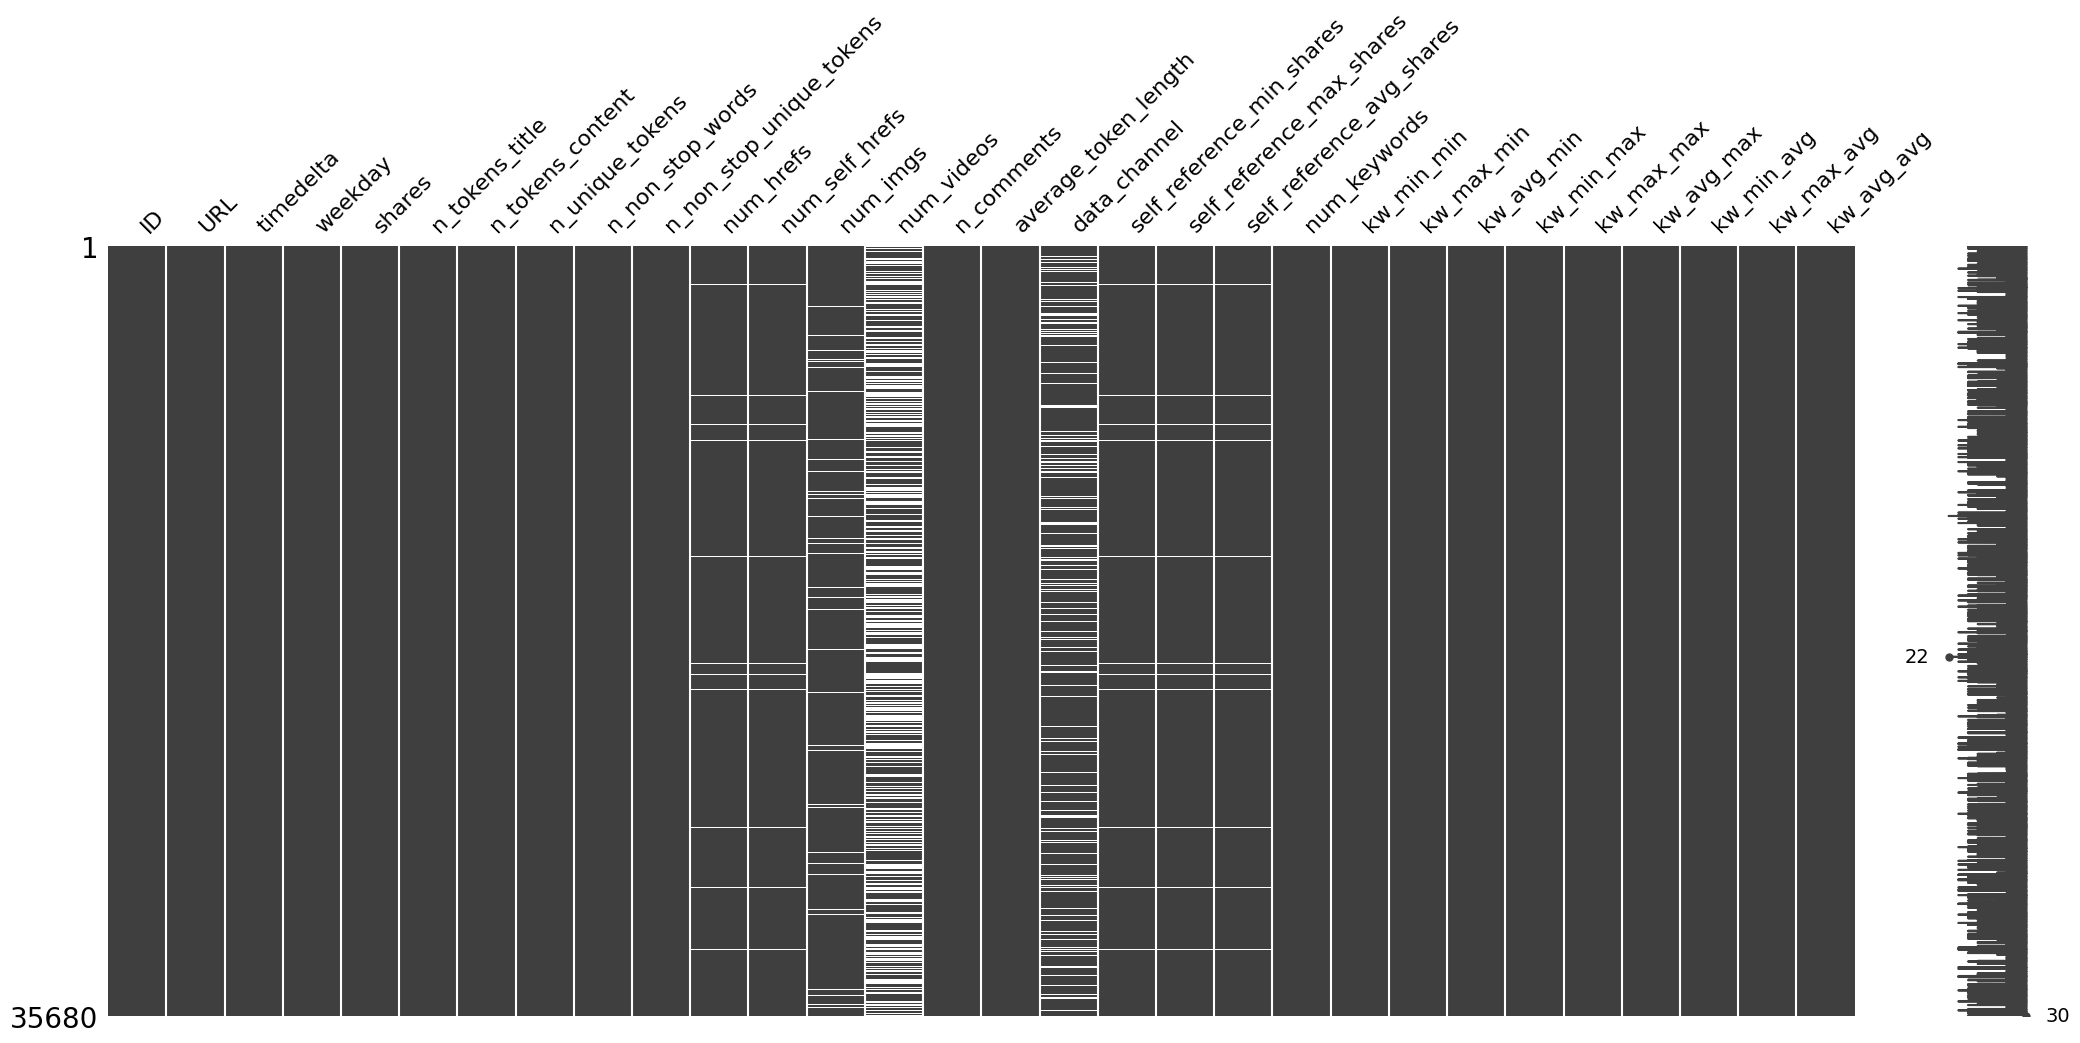

In [13]:
msno.matrix(df);

---
## └─ **Correlation Heatmap**

- Visualize the correlation of missing values for all numerical columns.

- It helps identify whether missing values in one column are correlated with missing values in other columns.

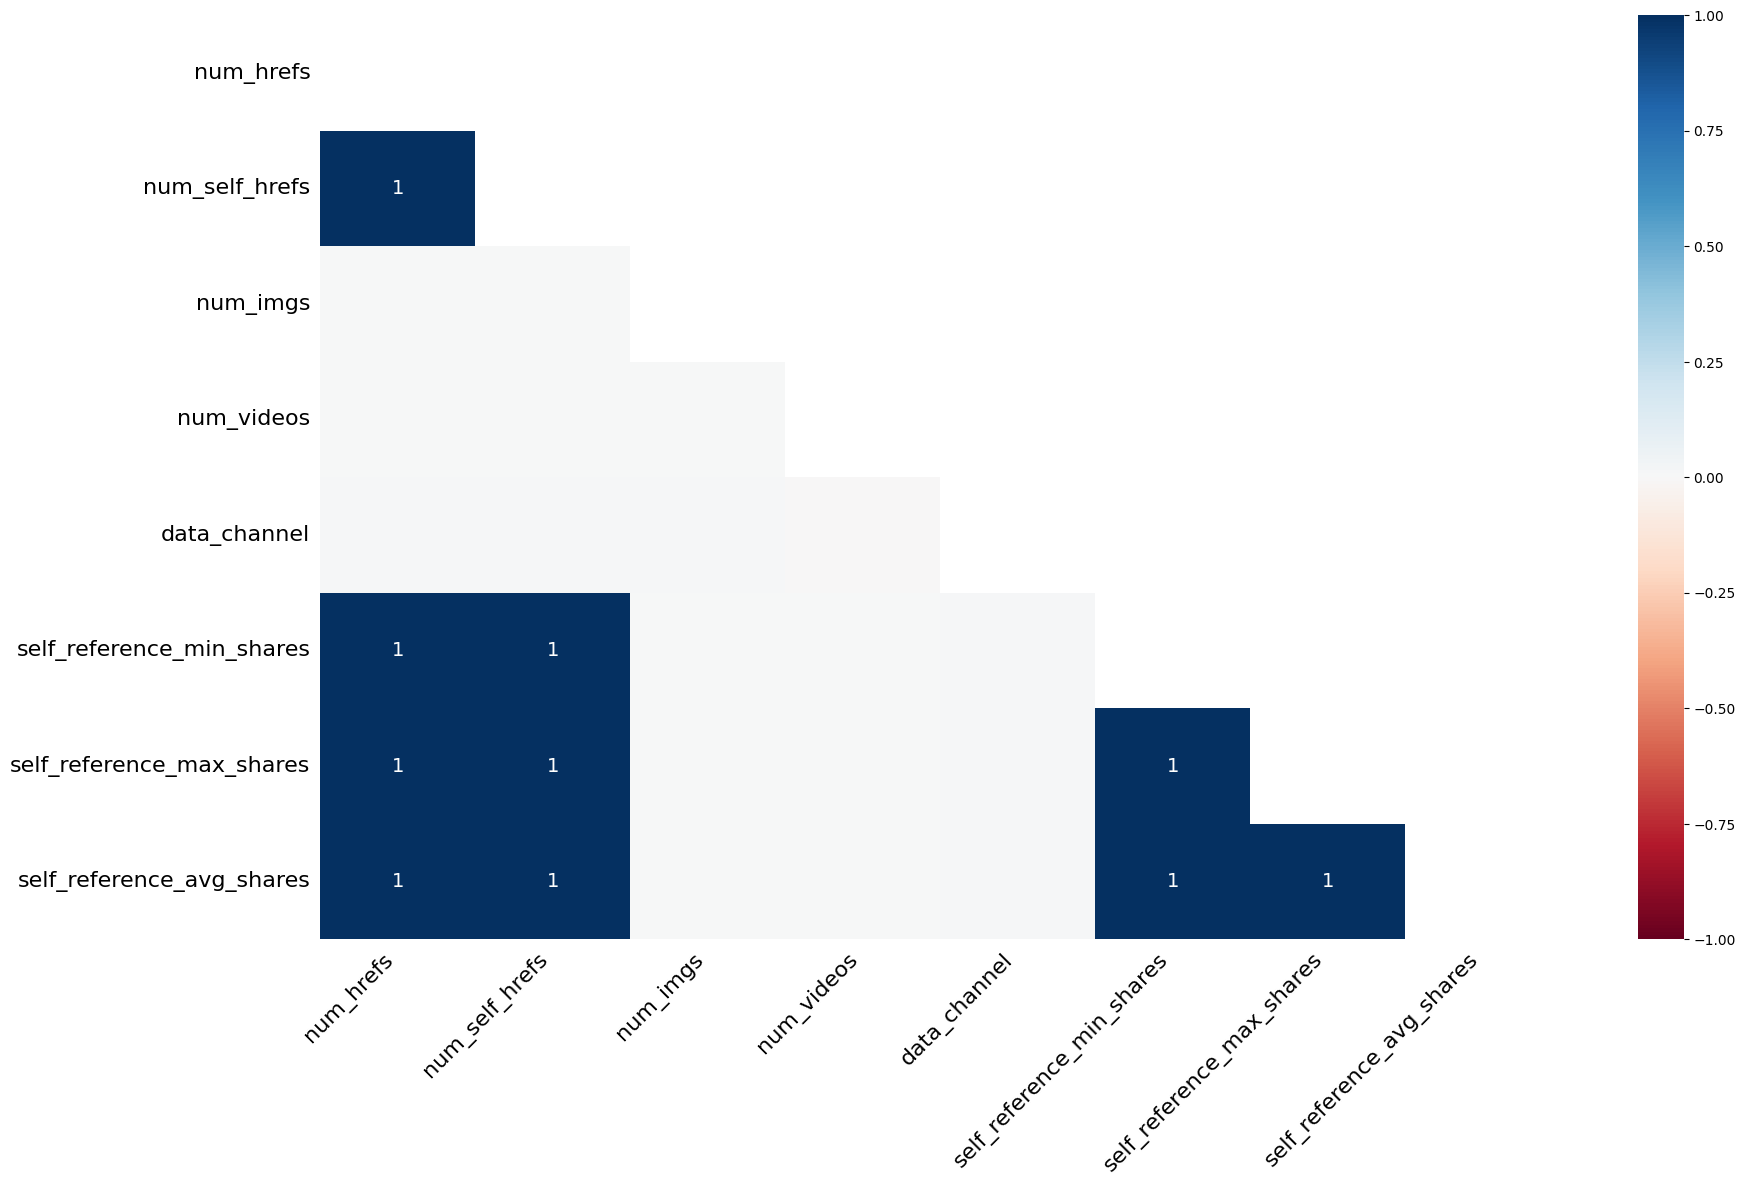

In [14]:
msno.heatmap(df);

---
---
# **🥈 7. Duplicate Values**

- Duplicate values can distort analyses and bias summary statistics if not addressed.

- Identifying duplicates allows you to assess whether they are valid repeats or errors in data entry.

- Handling duplicate values appropriately (e.g., aggregation, removal, or correction) improves the quality and reliability of your dataset.

---
## └─ **Duplicate Rows**

- Duplicate rows often arise from repeated data collection or merging datasets and can inflate counts.

- Removing exact duplicate rows ensures accurate analysis and prevents over-representation of certain observations.

In [15]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg


---
## └─ **Duplicate Identifiers**

- Duplicate identifiers (e.g., customer ID, transaction ID) can indicate data integrity issues.

- Ensuring unique identifiers is crucial for linking records accurately and maintaining consistency across analyses.

In [16]:
if IDENTIFIER_COLUMN:  # checks not None and not empty
    unique_data = df[IDENTIFIER_COLUMN].nunique()
    print("Shape:", df.shape)
    print("Unique Data:", unique_data)
else:
    print("Shape:", df.shape)
    print("Unique Data: [skipped — no identifier column]")

Shape: (35680, 30)
Unique Data: 35680


---
---
---